In [23]:
#필요한 라이브러리 불러오기
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [24]:
#데이터 준비, 캐글에서 제공되는 개와 고양이의 데이터로, 이번 프로젝트에서 우리는 개와 고양이를 분류할 예정입니다. 
#test 데이터에서 1은 개, 0은 고양이를 의미
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

path = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

In [25]:
#train 데이터와 validation 데이터에서 개와 고양이 이미지가 저장된 경로를 각각 변수에 저장
train_dir = os.path.join(path, 'train')
validation_dir = os.path.join(path, 'validation')
print(train_dir)
print(validation_dir)

/aiffel/.keras/datasets/cats_and_dogs_filtered/train
/aiffel/.keras/datasets/cats_and_dogs_filtered/validation


In [26]:
# directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats') 
print(train_cats_dir)

# directory with our training dog pictures 
train_dogs_dir = os.path.join(train_dir, 'dogs')  
print(train_dogs_dir)

# directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  
print(validation_cats_dir)

# directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  
print(validation_dogs_dir)

/aiffel/.keras/datasets/cats_and_dogs_filtered/train/cats
/aiffel/.keras/datasets/cats_and_dogs_filtered/train/dogs
/aiffel/.keras/datasets/cats_and_dogs_filtered/validation/cats
/aiffel/.keras/datasets/cats_and_dogs_filtered/validation/dogs


In [27]:
#train 데이터와 validation 데이터의 개수
num_cats_tr = len(os.listdir(train_cats_dir))
print('total training cat images:', num_cats_tr)
num_dogs_tr = len(os.listdir(train_dogs_dir))
print('total training dog images:', num_dogs_tr)

print("--")

num_cats_val = len(os.listdir(validation_cats_dir))
print('total validation cat images:', num_cats_val)
num_dogs_val = len(os.listdir(validation_dogs_dir))
print('total validation dog images:', num_dogs_val)

print("--")

total_train = num_cats_tr + num_dogs_tr
print("Total training images:", total_train)
total_val = num_cats_val + num_dogs_val
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
--
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [28]:
#필요한 파라미터 설정
# parameter Initialization
# parameter Initialization
batch_size = 32
epochs = 5
IMG_HEIGHT = 256
IMG_WIDTH = 256

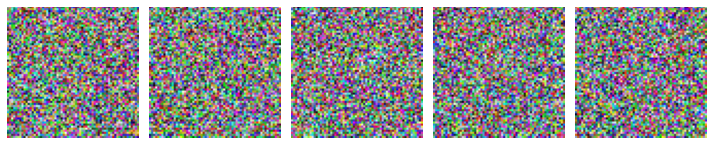

In [30]:
# 예시 이미지 배열 생성 (여기서는 랜덤 데이터를 사용)
images_arr = np.random.rand(5, 64, 64, 3)  # 5개의 64x64 RGB 이미지

# 데이터를 시각화하기 위한 함수
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(10,10))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
    
plotImages(images_arr)

In [31]:
# Training data generator
#train데이터가 2천장 밖에 안되므로 Data Augmentation(데이터증강)을 통해 데이터 수를 늘린다.
image_gen_train = ImageDataGenerator(rescale=1./255,
                                     rotation_range=0.3,
                                     width_shift_range=0.1,
                                     height_shift_range=0.1,
                                     zoom_range=0.2,
                                     horizontal_flip=True, 
                                     vertical_flip=False)

In [32]:
#.flow_from_directory를 사용하여 파이프라인을 만들어 directory와 작업 환경을 연결시켜 줍니다. 
#우리는 개와 고양이를 분류하는 task를 수행하기 때문에class_mode는 'binary'입니다. 
#Classification task에 따라 class_mode를 변경하시면 됩니다.
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

Found 2000 images belonging to 2 classes.


In [33]:
#Data Augmentation이 제대로 되었는지 확인
train_data_gen[0][0].shape

(32, 256, 256, 3)

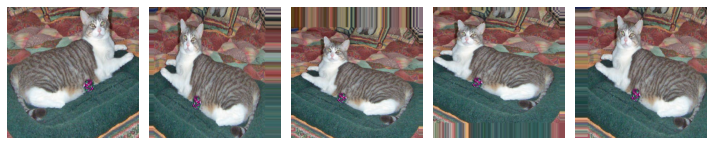

In [34]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [35]:
#Validation  데이터에도 train 데이터와 동일한 작업 진행. 데이터의 스케일만 변경
# Validation data generator
image_gen_val = ImageDataGenerator(rescale=1./255)

In [36]:
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=validation_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='binary')

Found 1000 images belonging to 2 classes.


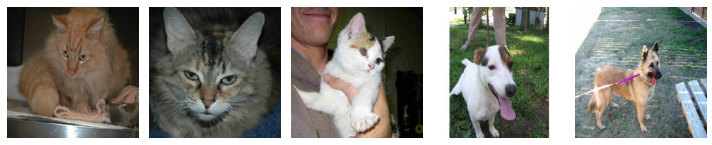

In [37]:
sample_training_images, _ = next(val_data_gen)
plotImages(sample_training_images[:5])

In [38]:
_[:5] # 정답 데이터

array([0., 0., 0., 1., 1.], dtype=float32)

In [20]:
input_layer = tf.keras.layers.Input(shape=(256, 256, 3))

x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(input_layer)
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)

x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)

x = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)

x = tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)

x = tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)

x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(4096, activation='relu')(x)
x = tf.keras.layers.Dense(4096, activation='relu')(x)
out_layer = tf.keras.layers.Dense(1000, activation='softmax')(x)

model = tf.keras.Model(inputs=input_layer, outputs=out_layer)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 256, 256, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 128)       0     

In [40]:
loss_function=tf.keras.losses.binary_crossentropy
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
metric = tf.keras.metrics.binary_accuracy

callbacks_list = [tf.keras.callbacks.TensorBoard(log_dir='log_dir', histogram_freq=1)]

model.compile(loss=loss_function,
              optimizer=optimizer,
              metrics=[metric])

# callbacks_list= [tf.keras.callbacks.TensorBoard(log_dir='log_dir', histogram_freq=1)]
# callback 함수를 활용하고 싶다면 추가해서 학습하는 데에 활용해 보세요

In [41]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
epochs = 10
history = model.fit(
      train_data_gen,
      steps_per_epoch=(len(os.listdir(train_cats_dir)) + len(os.listdir(train_dogs_dir)))/batch_size,
      epochs=epochs,
      validation_data=val_data_gen,
      # callbacks=callbacks_list,
      validation_freq=1)

Epoch 1/10


InvalidArgumentError:  required broadcastable shapes
	 [[node binary_crossentropy/logistic_loss/mul (defined at tmp/ipykernel_501/2008742978.py:3) ]] [Op:__inference_train_function_1312]

Function call stack:
train_function


In [42]:
#시각화를 통해 정확도 알아보기
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.plot(epochs_range, acc, 'bo', label='Training acc')
plt.plot(epochs_range, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs_range, loss, 'bo', label='Training loss')
plt.plot(epochs_range, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

NameError: name 'history' is not defined

In [44]:
#hyperparameter 변경
BATCH_SIZE = 32
EPOCHS = 20
LEARNING_RATE = 0.001

In [45]:
# 데이터 제너레이터 생성
train_datagen = ImageDataGenerator(
    rescale=1.0/255,  # 픽셀 값을 [0, 1] 범위로 정규화
    rotation_range=20,  # 이미지 회전 범위
    width_shift_range=0.2,  # 가로 이동 범위
    height_shift_range=0.2,  # 세로 이동 범위
    shear_range=0.2,  # 전단 변형
    zoom_range=0.2,  # 확대/축소 범위
    horizontal_flip=True,  # 수평 뒤집기
    fill_mode='nearest'  # 빈 공간 채우기
)

val_datagen = ImageDataGenerator(rescale=1.0/255)  # 검증 데이터는 정규화만 수행

# 데이터 제너레이터 생성
train_generator = train_datagen.flow_from_directory(
    'path/to/train_data',  # 훈련 데이터 경로
    target_size=(256, 256),  # 이미지 크기 조정
    batch_size=32,  # 배치 사이즈
    class_mode='categorical'  # 다중 클래스 분류
)

val_generator = val_datagen.flow_from_directory(
    'path/to/val_data',  # 검증 데이터 경로
    target_size=(256, 256),  # 이미지 크기 조정
    batch_size=32,  # 배치 사이즈
    class_mode='categorical'  # 다중 클래스 분류
)

FileNotFoundError: [Errno 2] No such file or directory: 'path/to/train_data'

In [46]:
# VGG16 모델 불러오기 (사전 학습된 가중치 사용)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# 모델에 새로운 레이어 추가
x = base_model.output
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
out_layer = tf.keras.layers.Dense(1000, activation='softmax')(x)

model = tf.keras.Model(inputs=base_model.input, outputs=out_layer)

NameError: name 'VGG16' is not defined

In [47]:
# 손실 함수, 옵티마이저 및 메트릭 설정
loss_function = 'categorical_crossentropy'  # 손실 함수
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)  # 옵티마이저
metrics = ['accuracy']  # 메트릭

# 모델 컴파일
model.compile(
    loss=loss_function,
    optimizer=optimizer,
    metrics=metrics
)

In [48]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16

# 하이퍼파라미터 설정
BATCH_SIZE = 32
EPOCHS = 20
LEARNING_RATE = 0.001

# VGG16 모델 불러오기 (사전 학습된 가중치 사용)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# 모델에 새로운 레이어 추가
x = base_model.output
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
out_layer = tf.keras.layers.Dense(1000, activation='softmax')(x)

model = tf.keras.Model(inputs=base_model.input, outputs=out_layer)

# 데이터 제너레이터 생성
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1.0/255)

# 데이터 제너레이터 생성
train_generator = train_datagen.flow_from_directory(
    'path/to/train_data',
    target_size=(256, 256),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    'path/to/val_data',
    target_size=(256, 256),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# 손실 함수, 옵티마이저 및 메트릭 설정
loss_function = 'categorical_crossentropy'
optimizer = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)
metrics = ['accuracy']

# 모델 컴파일
model.compile(
    loss=loss_function,
    optimizer=optimizer,
    metrics=metrics
)

model.summary()

58900480/58889256 [==============================] - 0s 0us/step


FileNotFoundError: [Errno 2] No such file or directory: 'path/to/train_data'

In [49]:
# 모델 학습
history = model.fit(
      train_data_gen,
      steps_per_epoch=(len(os.listdir(train_cats_dir)) + len(os.listdir(train_dogs_dir)))/batch_size,
      epochs=epochs,
      validation_data=val_data_gen,
      # callbacks=callbacks_list,
      validation_freq=1)

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

In [ ]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.plot(epochs_range, acc, 'bo', label='Training acc')
plt.plot(epochs_range, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs_range, loss, 'bo', label='Training loss')
plt.plot(epochs_range, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [50]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import VGG16

# 하이퍼파라미터 설정
BATCH_SIZE = 32
EPOCHS = 50
LEARNING_RATE = 0.001

# 데이터 제너레이터 생성
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1.0/255)

# 데이터 제너레이터 생성
train_generator = train_datagen.flow_from_directory(
    'path/to/train_data',
    target_size=(256, 256),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    'path/to/val_data',
    target_size=(256, 256),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# 모델 정의
input_layer = tf.keras.layers.Input(shape=(256, 256, 3))

x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(input_layer)
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)

x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)

x = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)

x = tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)

x = tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)

x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(4096, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)  # 드롭아웃 추가
x = tf.keras.layers.Dense(4096, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)  # 드롭아웃 추가
out_layer = tf.keras.layers.Dense(1000, activation='softmax')(x)

model = tf.keras.Model(inputs=input_layer, outputs=out_layer)

# 손실 함수, 옵티마이저 및 메트릭 설정
loss_function = 'categorical_crossentropy'
optimizer = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)
metrics = ['accuracy']

# 모델 컴파일
model.compile(
    loss=loss_function,
    optimizer=optimizer,
    metrics=metrics
)

# 조기 종료 설정
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# 모델 훈련
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_data=val_generator,
    validation_steps=val_generator.samples // BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping]
)

# 모델 요약
model.summary()

FileNotFoundError: [Errno 2] No such file or directory: 'path/to/train_data'

In [51]:
!pip3 install tensorflow-estimator==2.6.0

In [52]:
# Tensorflow와 Tensoflow Hub에 있는 이미 학습된 모델을 활용하기 위한 모듈 
import tensorflow as tf
import tensorflow_hub as hub

# 이미지를 다운로드하는 데에 사용하는 모듈
import matplotlib.pyplot as plt
import tempfile 
from six.moves.urllib.request import urlopen
from six import BytesIO

# 이미지에 선과 폰트를 넣기 위한 모듈
import numpy as np
from PIL import Image
from PIL import ImageColor
from PIL import ImageDraw
from PIL import ImageFont
from PIL import ImageOps

# Detection하는 데에 소요된 시간을 점검하기 위한 모듈
import time

In [53]:
def display_image(image):
  fig = plt.figure(figsize=(20, 15))
  plt.grid(False)
  plt.imshow(image)

In [54]:
def download_and_resize_image(url, new_width=256, new_height=256, display=False): 
  
  _, filename = tempfile.mkstemp(suffix=".jpg")
  response = urlopen(url)
  image_data = response.read()
  image_data = BytesIO(image_data)  # 이미지 읽기
  pil_image = Image.open(image_data)
  pil_image = ImageOps.fit(pil_image, (new_width, new_height), Image.ANTIALIAS) # 이미지 조정
  pil_image_rgb = pil_image.convert("RGB") #RBG로 변환
  pil_image_rgb.save(filename, format="JPEG", quality=90) # 이미지 저장
  print("Image downloaded to %s." % filename)
  if display:
    display_image(pil_image)
  return filename

In [55]:
def draw_bounding_box_on_image(image, 
                               ymin, xmin, ymax, xmax,
                               color,
                               font,
                               thickness=4,
                               display_str_list=()):
  
  draw = ImageDraw.Draw(image)
  im_width, im_height = image.size
  (left, right, top, bottom) = (xmin * im_width, xmax * im_width,
                                ymin * im_height, ymax * im_height)

# BBox 테두리 그리기
  draw.line([(left, top), (left, bottom), (right, bottom), (right, top),
             (left, top)],
            width=thickness,
            fill=color)

  display_str_heights = [font.getsize(ds)[1] for ds in display_str_list]
  
  total_display_str_height = (1 + 2 * 0.05) * sum(display_str_heights)

  if top > total_display_str_height:
    text_bottom = top
  else:
    text_bottom = top + total_display_str_height
  
  for display_str in display_str_list[::-1]:
    text_width, text_height = font.getsize(display_str)
    margin = np.ceil(0.05 * text_height)
    draw.rectangle([(left, text_bottom - text_height - 2 * margin),
                    (left + text_width, text_bottom)],
                   fill=color)
    draw.text((left + margin, text_bottom - text_height - margin),
              display_str,
              fill="black",
              font=font)
    text_bottom -= text_height - 2 * margin

In [56]:
# BBox 그리기
def draw_boxes(image, boxes, class_names, scores, max_boxes=10, min_score=0.1): 
  colors = list(ImageColor.colormap.values())

  try:
    font = ImageFont.truetype("/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf",
                              25)
  except IOError:
    print("Font not found, using default font.")
    font = ImageFont.load_default()

# BBox 그리기 적용
  for i in range(min(boxes.shape[0], max_boxes)):
    if scores[i] >= min_score:
      ymin, xmin, ymax, xmax = tuple(boxes[i])  # 박스 좌표값
      display_str = "{}: {}%".format(class_names[i].decode("ascii"),
                                     int(100 * scores[i]))
      color = colors[hash(class_names[i]) % len(colors)]
      image_pil = Image.fromarray(np.uint8(image)).convert("RGB")
      draw_bounding_box_on_image(
          image_pil,
          ymin,
          xmin,
          ymax,
          xmax,
          color,
          font,
          display_str_list=[display_str])
      np.copyto(image, np.array(image_pil))
  return image

Image downloaded to /tmp/tmps8iz6ejg.jpg.


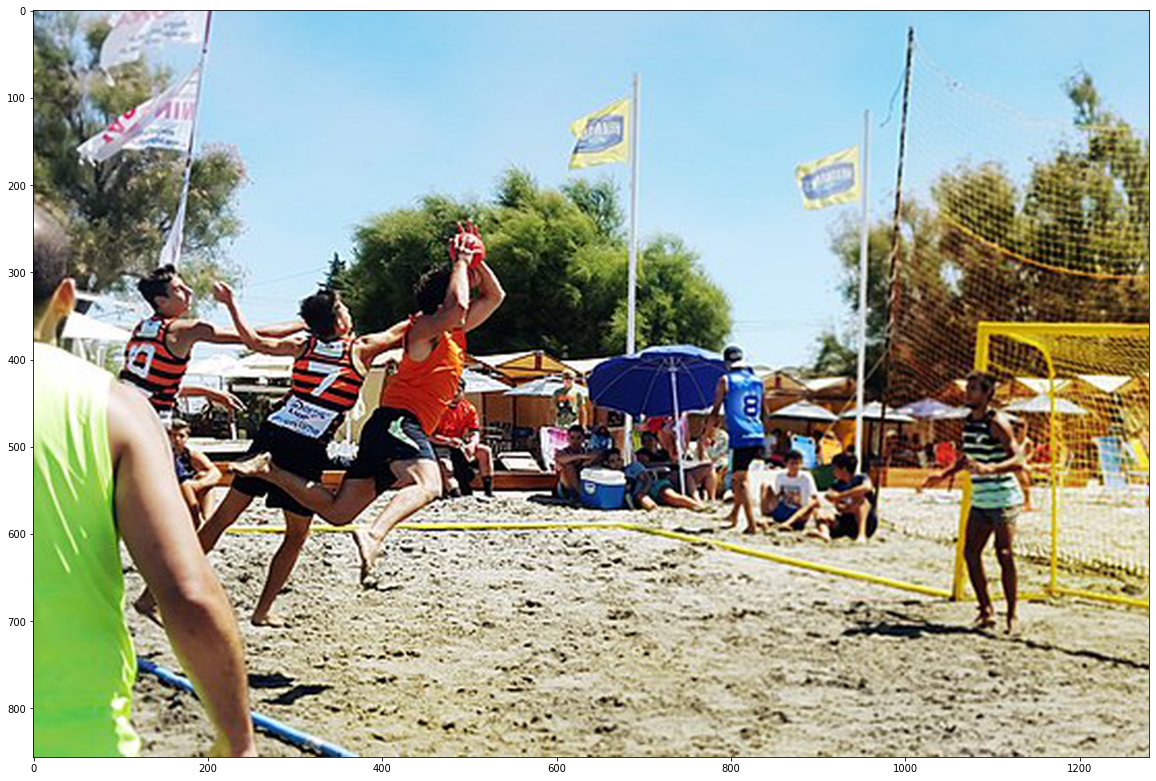

In [57]:
image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/d/db/Torneo_beach_handball.jpg/640px-Torneo_beach_handball.jpg"
downloaded_image_path = download_and_resize_image(image_url, 1280, 856, True)  # new_width와 new_height를 변경해 보세요.

In [58]:
module_handle = "https://tfhub.dev/google/faster_rcnn/openimages_v4/inception_resnet_v2/1"  

detector = hub.load(module_handle).signatures['default'] # detector에 사용할 모듈 저장

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [59]:
def load_img(path):
  img = tf.io.read_file(path)
  img = tf.image.decode_jpeg(img, channels=3)
  return img

In [60]:
def run_detector(detector, path):
  img = load_img(path) 

  converted_img  = tf.image.convert_image_dtype(img, tf.float32)[tf.newaxis, ...]

# 소요시간 측정
  start_time = time.time()
  result = detector(converted_img)
  end_time = time.time()

  result = {key:value.numpy() for key,value in result.items()}

# 이미지 추론 개수와 추론 시간 출력
  print("Found %d objects." % len(result["detection_scores"]))
  print("Inference time: ", end_time-start_time)

# 이미지 내 박스로 entity, scores를 추가하여 출력
  image_with_boxes = draw_boxes(
      img.numpy(), result["detection_boxes"],
      result["detection_class_entities"], result["detection_scores"])

  display_image(image_with_boxes)

Found 100 objects.
Inference time:  40.79126191139221


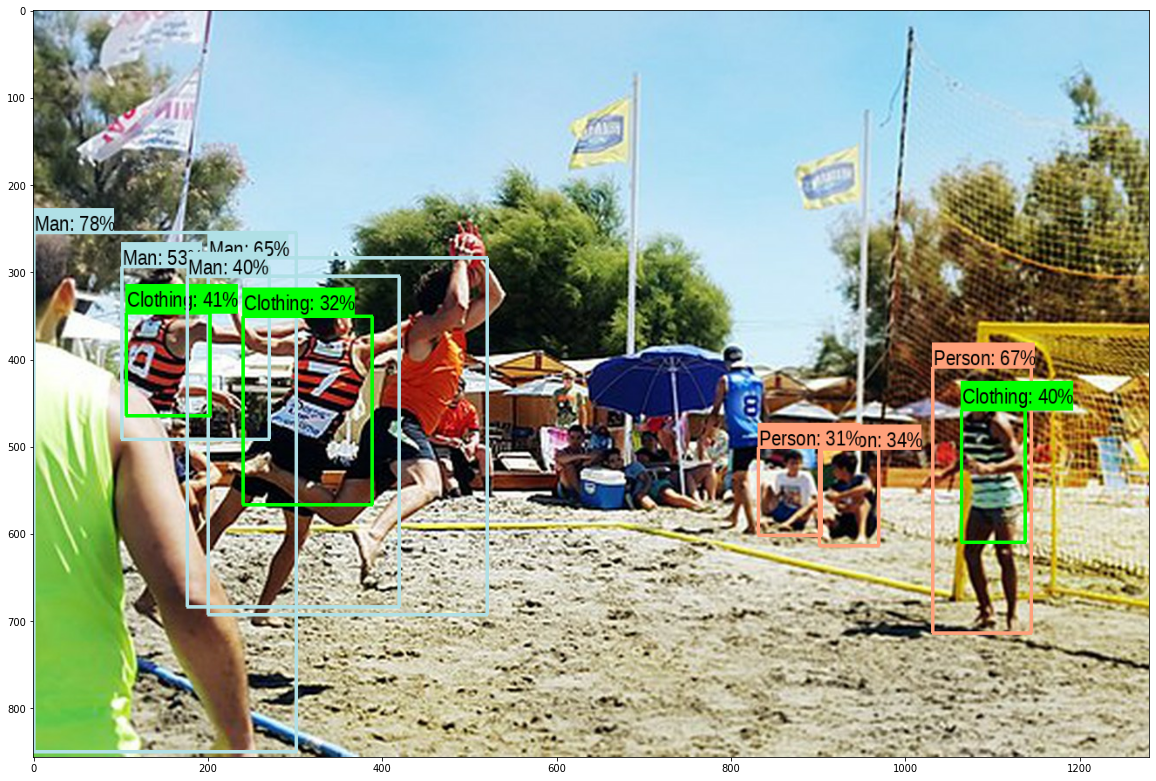

In [61]:
run_detector(detector, downloaded_image_path)

Image downloaded to /tmp/tmppwumljqp.jpg.


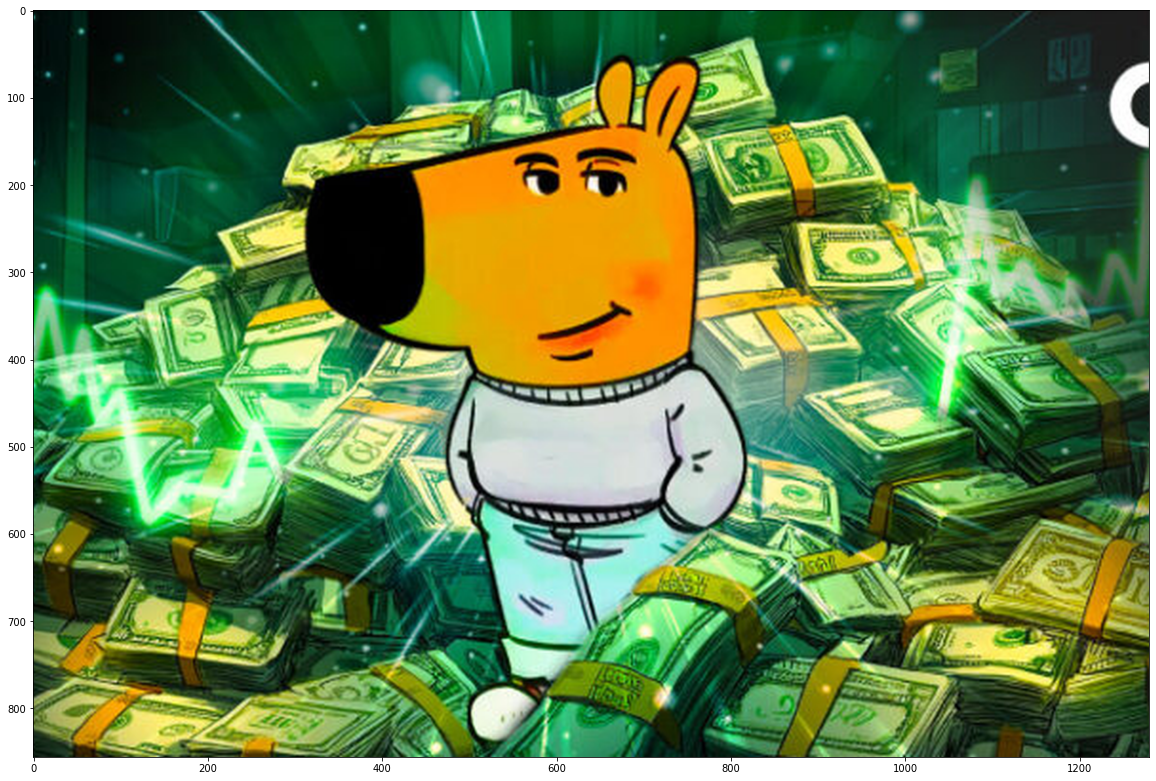

In [62]:
image_url = "https://coinedition.com/wp-content/uploads/2024/11/Will-CHILLGUY-Meme-Coins-445M-Market-Cap-Keep-Growing-or-Is-a-Correction-Coming-696x392.jpg"
downloaded_image_path = download_and_resize_image(image_url, 1280, 856, True)

In [64]:
def load_img(path):
  img = tf.io.read_file(path)
  img = tf.image.decode_jpeg(img, channels=3)
  return img

In [65]:
def run_detector(detector, path):
  img = load_img(path) 

  converted_img  = tf.image.convert_image_dtype(img, tf.float32)[tf.newaxis, ...]

# 소요시간 측정
  start_time = time.time()
  result = detector(converted_img)
  end_time = time.time()

  result = {key:value.numpy() for key,value in result.items()}

# 이미지 추론 개수와 추론 시간 출력
  print("Found %d objects." % len(result["detection_scores"]))
  print("Inference time: ", end_time-start_time)

# 이미지 내 박스로 entity, scores를 추가하여 출력
  image_with_boxes = draw_boxes(
      img.numpy(), result["detection_boxes"],
      result["detection_class_entities"], result["detection_scores"])

  display_image(image_with_boxes)

Found 100 objects.
Inference time:  1.368309497833252


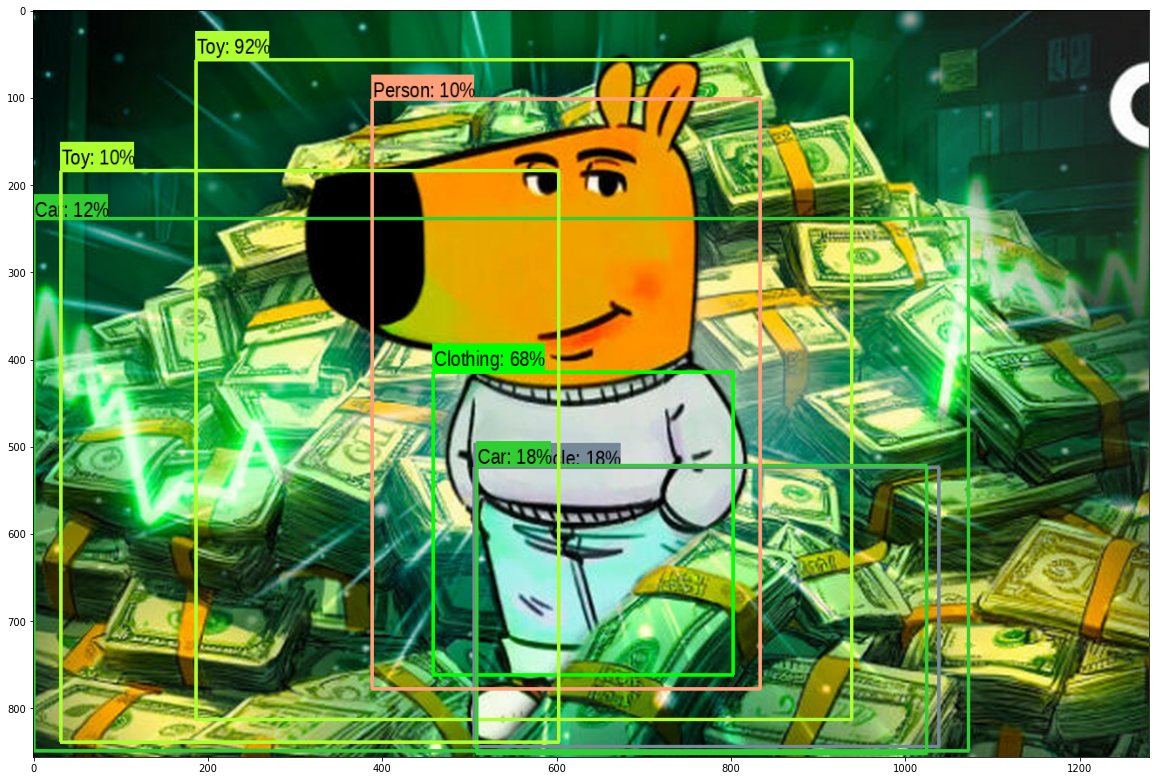

In [66]:
run_detector(detector, downloaded_image_path)